# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [1]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("seaborn")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330102 entries, 0 to 2330101
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 166
Occurred Date                        0
Occurred Time                       85
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21073
Address                             12
Zip Code                         14432
Council District                 47513
APD Sector                        9187
APD District                      9671
PRA                              10958
Census Tract                    538283
Clearance Status                609913
Clearance Date                  340719
UCR Category                   1534068
Category Description           1534068
X-coordinate                     10360
Y-coordinate                     10360
Latitude                         39452
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2330097,20143631822,FAMILY DISTURBANCE,3400,N,12/29/2014 11:41:00 PM,12/29/2014,2341.0,12/29/2014 11:41:00 PM,12/29/2014,2341.0,RESIDENCE / HOME,109 MASTERSON PASS,78753.0,4.0,ED,1,240,18.23,N,01/02/2015,NaN,NaN,3130776.0,3130776.0,30.369795,-97.687855,"(30.36979494, -97.68785533)"
2330098,20191270738,THEFT BY SHOPLIFTING,607,N,05/07/2019 10:50:00 AM,05/07/2019,1050.0,05/07/2019 11:31:00 AM,05/07/2019,1131.0,DEPARTMENT / DISCOUNT STORE,11423 N LAMAR BLVD,78753.0,7.0,ED,4,221,18.24,NaN,NaN,23C,Theft,3131578.0,3131578.0,30.383630,-97.684932,"(30.38362955, -97.68493154)"
2330099,2008501470,CRIMINAL TRESPASS/TRANSIENT,2721,N,02/19/2008 05:00:00 PM,02/19/2008,1700.0,02/19/2008 05:00:00 PM,02/19/2008,1700.0,PARKING LOTS / GARAGE,6800 BERKMAN DR,78723.0,1.0,ID,5,293,21.00,NaN,NaN,NaN,NaN,3130390.0,3130390.0,30.320281,-97.690437,"(30.32028083, -97.6904366)"
2330100,2003921400113,DWI,2100,N,05/20/2003 01:32:00 AM,05/20/2003,132.0,05/20/2003 01:32:00 AM,05/20/2003,132.0,STREETS / HWY / ROAD / ALLEY,4500 N MOPAC EXPY NB,78731.0,10.0,BA,6,325,1.00,C,05/22/2003,NaN,NaN,3109748.0,3109748.0,30.320565,-97.755869,"(30.32056515, -97.7558693)"
2330101,20081340129,URINATING IN PUBLIC PLACE,3212,N,05/13/2008 01:10:00 AM,05/13/2008,110.0,05/13/2008 01:10:00 AM,05/13/2008,110.0,STREETS / HWY / ROAD / ALLEY,400 BLOCK E 6TH ST,78701.0,9.0,GE,2,382,11.00,C,05/17/2008,NaN,NaN,3115491.0,3115491.0,30.267351,-97.739093,"(30.26735144, -97.73909331)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Incident Number",
        "Occurred Time",
        "Occurred Date Time",
        "Highest Offense Code",
        "Census Tract",
        "PRA",
        "Report Date",
        "Report Time",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "clearance_status",
    ]
    df[fillna].fillna("N/A", inplace=True)
    date_col = ["occurred_date", "report_date_time", "clearance_date"]
    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")
    df["year"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.day
    df.set_index(["occurred_date"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [6]:
df.duplicated().sum()

835

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [31]:
# Re-examining the dataframe
display(df.head())
display(df.tail())

,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2003-01-01,DAMAGE CITY PROP,N,2003-01-01 02:58:00,STREETS / HWY / ROAD / ALLEY,3141 E 12TH ST,78702.0,1.0,CH,2,N,2003-01-21,30.276561,-97.700728,2003,1,1,1
2003-01-01,VIOL CITY ORDINANCE - CURFEW,N,2003-01-01 02:37:00,STREETS / HWY / ROAD / ALLEY,11502 JUNIPER RIDGE DR,78759.0,10.0,AD,7,N,2003-01-09,30.421508,-97.761221,2003,1,1,1
2003-01-01,DWI,N,2003-01-01 16:44:00,STREETS / HWY / ROAD / ALLEY,12060 JOLLYVILLE RD,78759.0,10.0,AD,7,C,2003-01-01,30.428112,-97.761372,2003,1,1,1
2003-01-01,BURGLARY OF VEHICLE,N,2003-01-05 06:51:00,PARKING LOTS / GARAGE,1330 E RUNDBERG LN,78753.0,4.0,ED,7,N,NaT,30.352710,-97.678553,2003,1,1,1
2003-01-01,BURGLARY OF VEHICLE,N,2003-01-01 21:59:00,PARKING LOTS / GARAGE,10825 N LAMAR BLVD,78753.0,4.0,ED,1,C,2003-01-02,30.377393,-97.688595,2003,1,1,1


,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2021-05-01,ROBBERY BY ASSAULT,N,2021-05-01 14:12:00,OTHER / UNKNOWN,422 W RIVERSIDE DR,78704.0,9.0,DA,1,NaN,NaT,30.259528,-97.748697,2021,5,17,1
2021-05-01,CRIMINAL MISCHIEF,N,2021-05-02 00:26:00,RESIDENCE / HOME,5002 CAPE VERDE CV,78744.0,2.0,FR,5,NaN,NaT,30.193295,-97.740661,2021,5,17,1
2021-05-01,THEFT,N,2021-05-01 04:29:00,RESIDENCE / HOME,3320 HARMON AVE,78705.0,9.0,BA,1,NaN,NaT,30.291884,-97.723101,2021,5,17,1
2021-05-01,ASSAULT BY CONTACT,N,2021-05-01 18:49:00,RESIDENCE / HOME,1212 W BEN WHITE BLVD SVRD WB,78704.0,5.0,DA,2,NaN,NaT,30.228508,-97.778086,2021,5,17,1
2021-05-01,THEFT,N,2021-05-01 03:35:00,BAR / NIGHT CLUB,314 E 6TH ST,78701.0,9.0,GE,2,NaN,NaT,30.267526,-97.739722,2021,5,17,1


## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

,zip_code
78741.0,208753
78753.0,181083
78701.0,169844
78758.0,161517
78704.0,156386
78745.0,152560
78702.0,137834
78744.0,127693
78723.0,119741
78752.0,85386


,zip_code
78741.0,0.090180
78753.0,0.078227
78701.0,0.073372
78758.0,0.069775
78704.0,0.067558
78745.0,0.065905
78702.0,0.059544
78744.0,0.055163
78723.0,0.051728
78752.0,0.036886


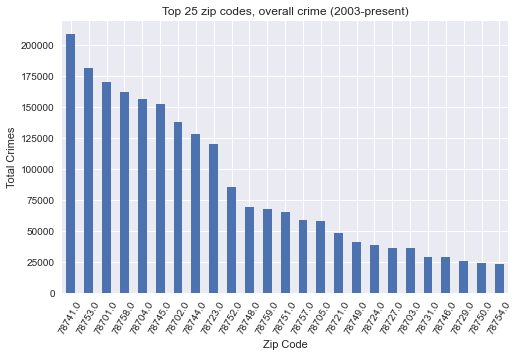

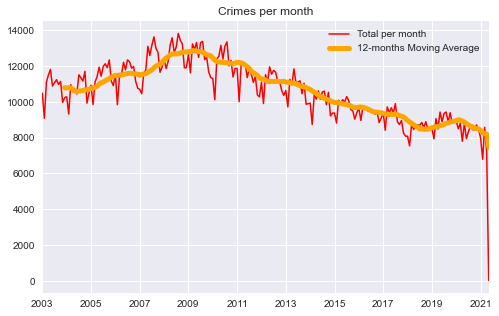

In [10]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25).to_frame())
display(df.zip_code.value_counts(normalize=True).head(25).to_frame())

# Visualizing the top 25 crime-ridden zip codes in Austin
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 5),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 5))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

,highest_offense_description
BURGLARY OF VEHICLE,232240
THEFT,213344
FAMILY DISTURBANCE,182079
CRIMINAL MISCHIEF,128747
ASSAULT W/INJURY-FAM/DATE VIOL,78828
BURGLARY OF RESIDENCE,77513
DWI,70055
PUBLIC INTOXICATION,68960
HARASSMENT,64875
DISTURBANCE - OTHER,62219


,BURGLARY OF VEHICLE,DWI,BURGLARY OF RESIDENCE,CRIMINAL MISCHIEF,ASSAULT W/INJURY-FAM/DATE VIOL,PUBLIC INTOXICATION,FAMILY DISTURBANCE,HARASSMENT,TOTAL
occurred_date,,,,,,,,,
2003-01-31,1230,407.0,328,723,349.0,341.0,505.0,293,4176.0
2003-02-28,1115,328.0,249,598,342.0,354.0,500.0,309,3795.0
2003-03-31,1229,406.0,394,701,421.0,450.0,546.0,363,4510.0
2003-04-30,1404,375.0,398,715,432.0,385.0,678.0,353,4740.0
2003-05-31,1496,418.0,436,752,424.0,451.0,650.0,345,4972.0
...,...,...,...,...,...,...,...,...,...
2021-01-31,360,168.0,128,432,256.0,55.0,815.0,254,2468.0
2021-02-28,310,130.0,116,338,245.0,62.0,813.0,167,2181.0
2021-03-31,433,179.0,156,428,259.0,75.0,876.0,192,2598.0


<Figure size 432x288 with 0 Axes>

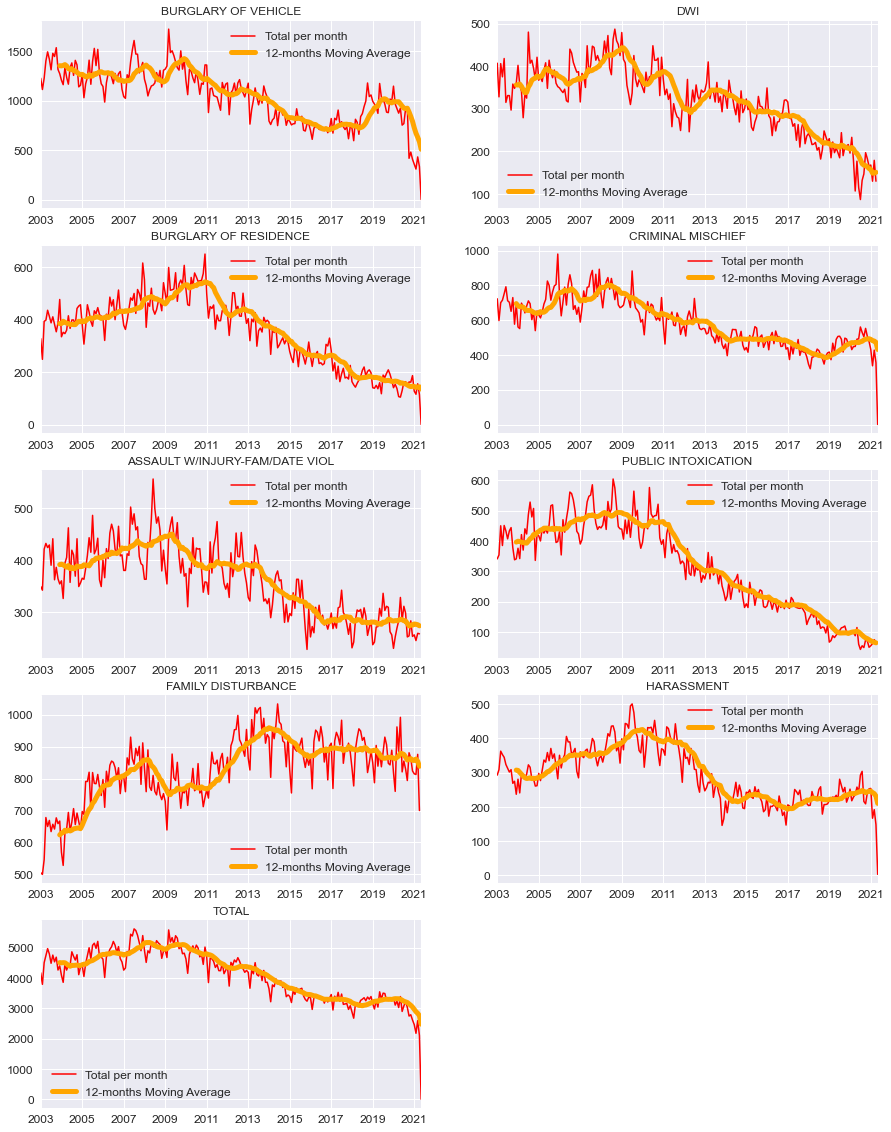

In [37]:
display(df["highest_offense_description"].value_counts().head(10).to_frame())

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly)

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

,highest_offense_description
PUBLIC INTOXICATION,17198
THEFT,15914
BURGLARY OF VEHICLE,9324
WARRANT ARREST NON TRAFFIC,8967
DWI,8350
ASSAULT WITH INJURY,7610
VIOL CITY ORDINANCE - OTHER,6191
POSS OF DRUG PARAPHERNALIA,6083
CRIMINAL MISCHIEF,5899
CRIMINAL TRESPASS,3946


,highest_offense_description
PUBLIC INTOXICATION,0.101258
THEFT,0.093698
BURGLARY OF VEHICLE,0.054897
WARRANT ARREST NON TRAFFIC,0.052796
DWI,0.049163
ASSAULT WITH INJURY,0.044806
VIOL CITY ORDINANCE - OTHER,0.036451
POSS OF DRUG PARAPHERNALIA,0.035815
CRIMINAL MISCHIEF,0.034732
CRIMINAL TRESPASS,0.023233


<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

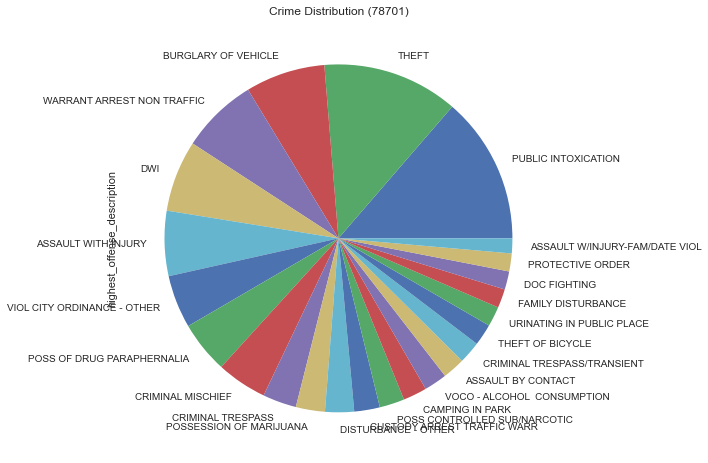

In [12]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off.to_frame())
display(df_01.highest_offense_description.value_counts(normalize=True).head(24).to_frame())
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

THEFT                             17256
BURGLARY OF VEHICLE               16012
FAMILY DISTURBANCE                14859
CRIMINAL MISCHIEF                  9556
THEFT BY SHOPLIFTING               7690
ASSAULT W/INJURY-FAM/DATE VIOL     7246
BURGLARY OF RESIDENCE              6102
DWI                                5081
DISTURBANCE - OTHER                4816
CUSTODY ARREST TRAFFIC WARR        4352
AUTO THEFT                         4298
HARASSMENT                         4296
POSS OF DRUG PARAPHERNALIA         3737
PUBLIC INTOXICATION                3377
ASSAULT WITH INJURY                3366
CRIMINAL TRESPASS                  3177
POSS CONTROLLED SUB/NARCOTIC       3004
RUNAWAY CHILD                      2960
WARRANT ARREST NON TRAFFIC         2798
POSSESSION OF MARIJUANA            2715
BURGLARY NON RESIDENCE             2520
VIOL CITY ORDINANCE - OTHER        1871
Name: highest_offense_description, dtype: int64
----------------------------------
THEFT                             0.0

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

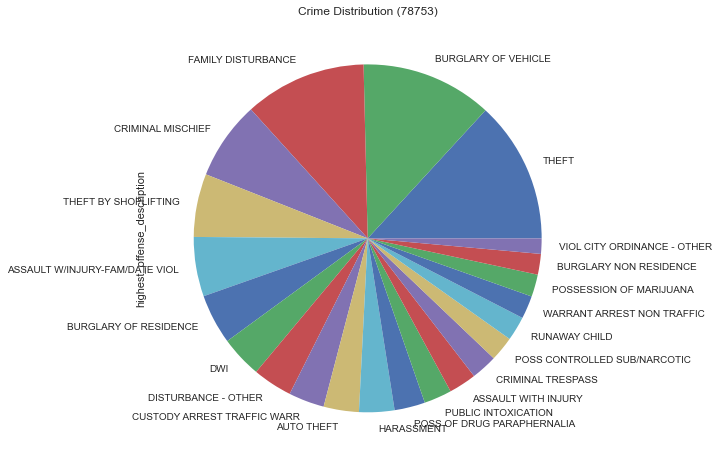

In [13]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
print(df_53_off)
print("----------------------------------")
print(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

FAMILY DISTURBANCE                20583
BURGLARY OF VEHICLE               19901
THEFT                             15705
CRIMINAL MISCHIEF                 11121
ASSAULT W/INJURY-FAM/DATE VIOL     9693
BURGLARY OF RESIDENCE              8918
PUBLIC INTOXICATION                6399
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5697
HARASSMENT                         5572
DISTURBANCE - OTHER                5212
AUTO THEFT                         4709
ASSAULT WITH INJURY                4577
CRIMINAL TRESPASS                  3959
POSS CONTROLLED SUB/NARCOTIC       3895
POSSESSION OF MARIJUANA            3802
THEFT BY SHOPLIFTING               3591
POSS OF DRUG PARAPHERNALIA         3549
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2805
VIOL CITY ORDINANCE - OTHER        2197
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.098600
BURGLARY OF VEHICLE               

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

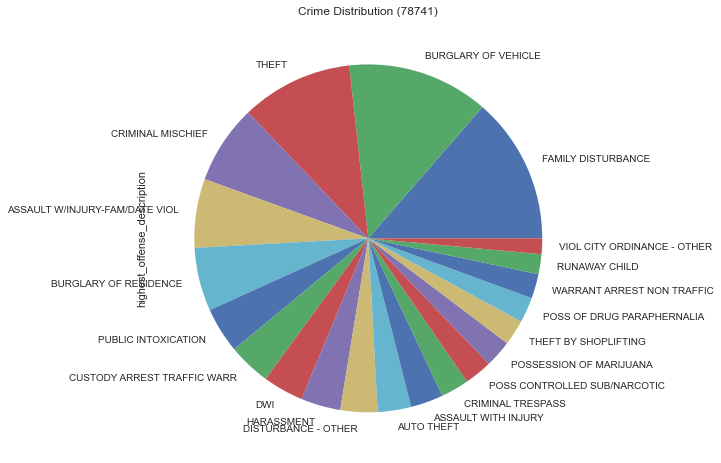

In [14]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
print(df_41_off)
print("----------------------------------")
print(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

FAMILY DISTURBANCE                15143
BURGLARY OF VEHICLE               14791
THEFT                             13653
CRIMINAL MISCHIEF                  8600
BURGLARY OF RESIDENCE              5884
ASSAULT W/INJURY-FAM/DATE VIOL     5799
HARASSMENT                         5176
DISTURBANCE - OTHER                4567
DWI                                4446
PUBLIC INTOXICATION                4010
CUSTODY ARREST TRAFFIC WARR        3248
AUTO THEFT                         2905
BURGLARY NON RESIDENCE             2890
ASSAULT WITH INJURY                2712
RUNAWAY CHILD                      2617
POSSESSION OF MARIJUANA            2594
WARRANT ARREST NON TRAFFIC         2109
POSS CONTROLLED SUB/NARCOTIC       2053
THEFT BY SHOPLIFTING               2010
CRIMINAL TRESPASS                  1971
IDENTITY THEFT                     1671
POSS OF DRUG PARAPHERNALIA         1528
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.0

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

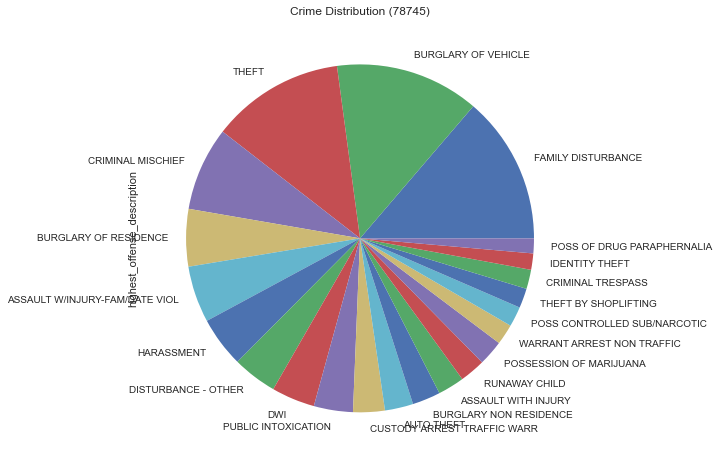

In [15]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
print(df_45_off)
print("----------------------------------")
print(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

BURGLARY OF VEHICLE               8688
THEFT                             5653
CRIMINAL MISCHIEF                 4999
THEFT OF BICYCLE                  3526
PUBLIC INTOXICATION               2633
BURGLARY OF RESIDENCE             2129
WARRANT ARREST NON TRAFFIC        1550
CRIMINAL TRESPASS                 1367
AUTO THEFT                        1354
ASSAULT WITH INJURY               1271
HARASSMENT                        1228
DWI                               1221
FAMILY DISTURBANCE                1219
DISTURBANCE - OTHER               1129
BURGLARY NON RESIDENCE             888
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        792
GRAFFITI                           785
CUSTODY ARREST TRAFFIC WARR        782
ASSAULT W/INJURY-FAM/DATE VIOL     704
POSSESSION OF MARIJUANA            663
ASSAULT BY CONTACT                 627
Name: highest_offense_description, dtype: int64

'----------------------------------'

BURGLARY OF VEHICLE               0.150278
THEFT                             0.097781
CRIMINAL MISCHIEF                 0.086468
THEFT OF BICYCLE                  0.060990
PUBLIC INTOXICATION               0.045543
BURGLARY OF RESIDENCE             0.036826
WARRANT ARREST NON TRAFFIC        0.026811
CRIMINAL TRESPASS                 0.023645
AUTO THEFT                        0.023420
ASSAULT WITH INJURY               0.021985
HARASSMENT                        0.021241
DWI                               0.021120
FAMILY DISTURBANCE                0.021085
DISTURBANCE - OTHER               0.019528
BURGLARY NON RESIDENCE            0.015360
CRIMINAL TRESPASS/TRANSIENT       0.015014
VIOL CITY ORDINANCE - OTHER       0.013699
GRAFFITI                          0.013578
CUSTODY ARREST TRAFFIC WARR       0.013526
ASSAULT W/INJURY-FAM/DATE VIOL    0.012177
POSSESSION OF MARIJUANA           0.011468
ASSAULT BY CONTACT                0.010845
Name: highest_offense_description, dtype: float64

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

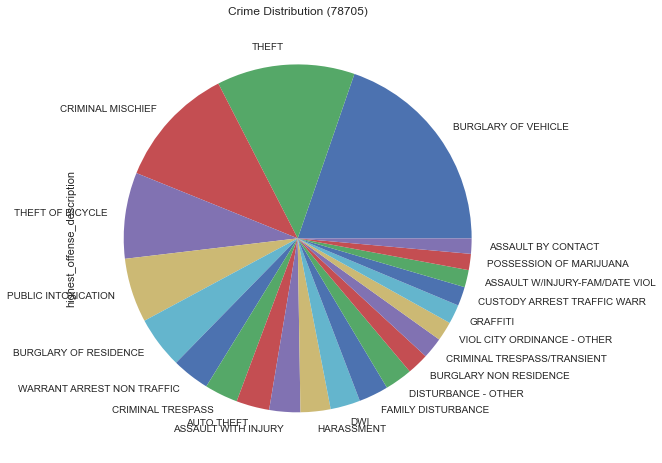

In [16]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off)
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

BURGLARY OF VEHICLE               5425
THEFT                             5108
THEFT BY SHOPLIFTING              2556
CRIMINAL MISCHIEF                 1276
DWI                                885
FAMILY DISTURBANCE                 772
VIOL CITY ORDINANCE - OTHER        652
HARASSMENT                         635
AUTO THEFT                         611
BURGLARY OF RESIDENCE              523
THEFT FROM PERSON                  462
IDENTITY THEFT                     450
DISTURBANCE - OTHER                436
BURGLARY NON RESIDENCE             359
ASSAULT W/INJURY-FAM/DATE VIOL     340
CRED CARD ABUSE - OTHER            329
PUBLIC INTOXICATION                321
POSSESSION OF MARIJUANA            297
FRAUD - OTHER                      282
SUSPICIOUS PERSON                  259
CUSTODY ARREST TRAFFIC WARR        247
WARRANT ARREST NON TRAFFIC         223
ASSAULT WITH INJURY                199
VIOL WATER SAFETY ACT              195
Name: highest_offense_description, dtype: int64

BURGLARY OF VEHICLE               0.191014
THEFT                             0.179853
THEFT BY SHOPLIFTING              0.089997
CRIMINAL MISCHIEF                 0.044928
DWI                               0.031161
FAMILY DISTURBANCE                0.027182
VIOL CITY ORDINANCE - OTHER       0.022957
HARASSMENT                        0.022358
AUTO THEFT                        0.021513
BURGLARY OF RESIDENCE             0.018415
THEFT FROM PERSON                 0.016267
IDENTITY THEFT                    0.015845
DISTURBANCE - OTHER               0.015352
BURGLARY NON RESIDENCE            0.012640
ASSAULT W/INJURY-FAM/DATE VIOL    0.011971
CRED CARD ABUSE - OTHER           0.011584
PUBLIC INTOXICATION               0.011302
POSSESSION OF MARIJUANA           0.010457
FRAUD - OTHER                     0.009929
SUSPICIOUS PERSON                 0.009119
CUSTODY ARREST TRAFFIC WARR       0.008697
WARRANT ARREST NON TRAFFIC        0.007852
ASSAULT WITH INJURY               0.007007
VIOL WATER 

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

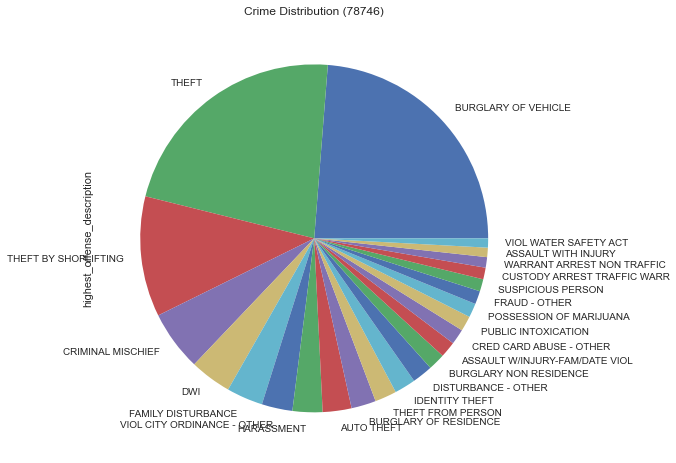

In [17]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off)
display(df_46.highest_offense_description.value_counts(normalize=True).head(24))
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [18]:
# Creating separate dataframes for overall & violent crime
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "AGG ASLT STRANGLE/SUFFOCATE", "AGG ASSAULT FAM/DATE VIOLENCE", "AGG ASSAULT WITH MOTOR VEH", "AGG ASLT ENHANC STRANGL/SUFFOC", "AGG ROBBERY BY ASSAULT", "AGG ASLT W/MOTOR VEH FAM/DAT V", "AGG SEXUAL ASSAULT CHILD/OBJEC", "AGG SEXUAL ASSAULT W OBJECT", "AGG ASSAULT ON PUBLIC SERVANT", "AGG RAPE OF A CHILD", "MURDER", "CAPITAL MURDER", "CRASH/MURDER", "EXPIRED-ATT MURDER", "EXPIRED-ATT CAPITAL MURDER", "RAPE"]'
)
df_viol_mur = df.query(
    'highest_offense_description == ["MURDER", "CAPITAL MURDER", "CRASH/MURDER", "EXPIRED-ATT MURDER", "EXPIRED-ATT CAPITAL MURDER"]'
)
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]
df_21 = df[df.year == 2021]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]
df_viol_21 = df_viol[df_viol.year == 2021]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]
df_viol_mur_21 = df_viol_mur[df_viol_mur.year == 2021]

78741.0    0.126467
78753.0    0.097709
78758.0    0.093864
78723.0    0.075420
78702.0    0.067429
78745.0    0.061121
78744.0    0.060240
78701.0    0.053551
78752.0    0.049025
78704.0    0.047322
78721.0    0.031782
78724.0    0.026896
78748.0    0.021909
78757.0    0.020026
78705.0    0.016902
78751.0    0.015961
78759.0    0.015961
78727.0    0.010954
78754.0    0.010294
78749.0    0.010093
78617.0    0.009473
78729.0    0.009072
78722.0    0.008371
78750.0    0.006869
78731.0    0.005647
Name: zip_code, dtype: float64

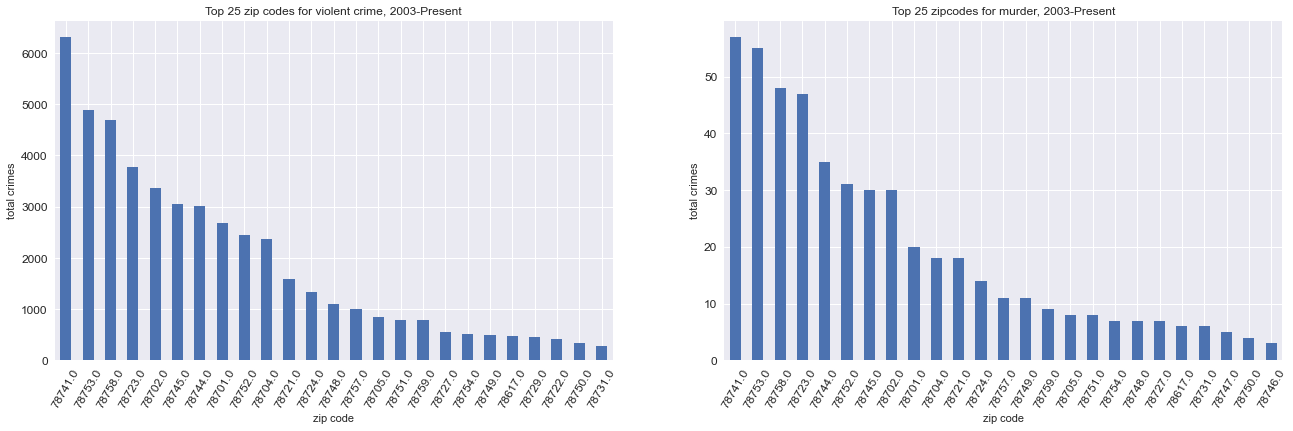

highest_offense_description,AGG ASLT ENHANC STRANGL/SUFFOC,AGG ASLT STRANGLE/SUFFOCATE,AGG ASLT W/MOTOR VEH FAM/DAT V,AGG ASSAULT,AGG ASSAULT FAM/DATE VIOLENCE,AGG ASSAULT ON PUBLIC SERVANT,AGG ASSAULT WITH MOTOR VEH,AGG RAPE OF A CHILD,AGG ROBBERY BY ASSAULT,AGG ROBBERY/DEADLY WEAPON,AGG SEXUAL ASSAULT CHILD/OBJEC,AGG SEXUAL ASSAULT W OBJECT,CAPITAL MURDER,CRASH/MURDER,EXPIRED-ATT CAPITAL MURDER,EXPIRED-ATT MURDER,MURDER,RAPE
zip_code,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
78610.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
78613.0,1,11,4,15,8,0,2,1,2,11,1,0,0,0,0,0,1,7
78617.0,7,69,10,124,103,1,16,13,3,62,21,1,0,0,0,0,6,37
78621.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
78634.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78640.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
78641.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78652.0,0,2,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0


ValueError: num must be 1 <= num <= 15, not 0

<Figure size 432x288 with 0 Axes>

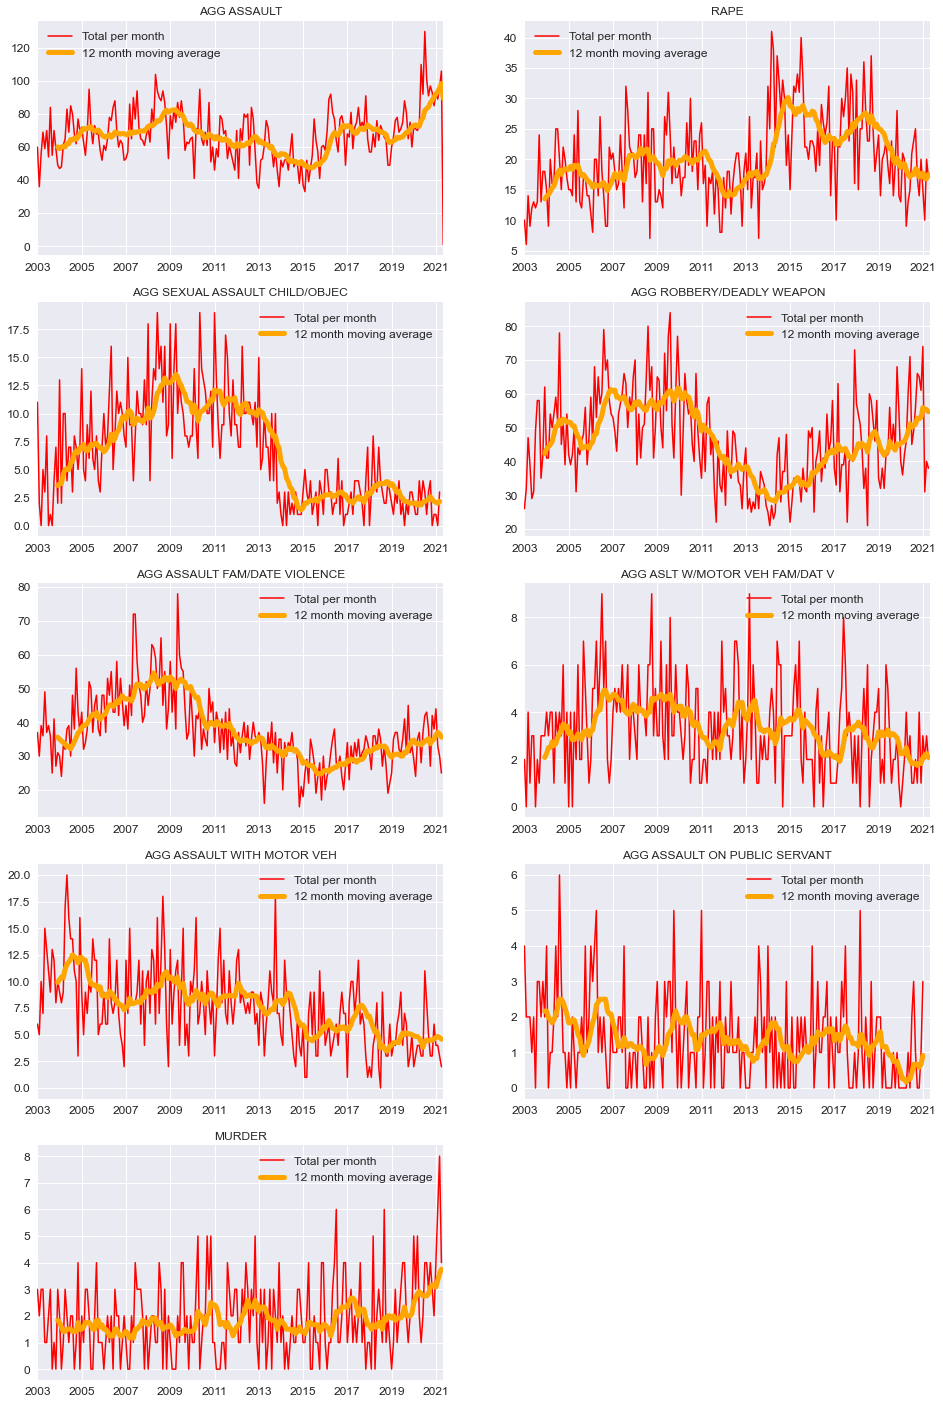

In [19]:
display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGG ASSAULT"]
    .resample("M")
    .size()
)
monthly.columns = ["AGG ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly["Total"] = monthly.sum(axis=1)

crimeTypes = monthly.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in crimeTypes:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1


viol_freq.to_csv("viol_freq.csv")
mur_freq.to_csv("mur_freq.csv")

### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

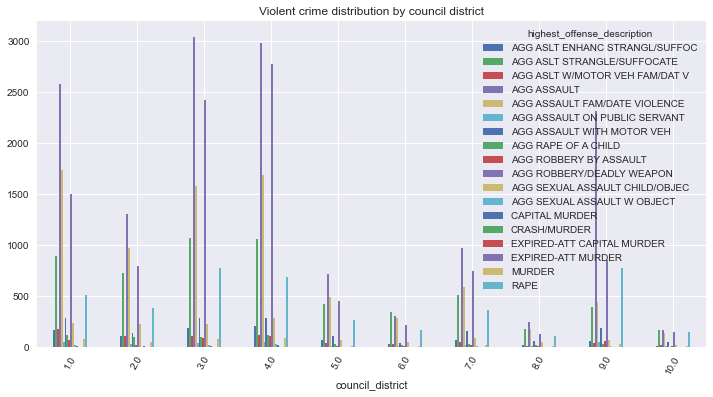

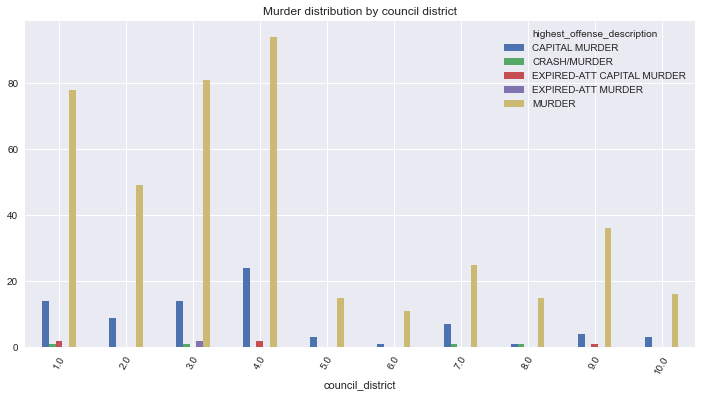

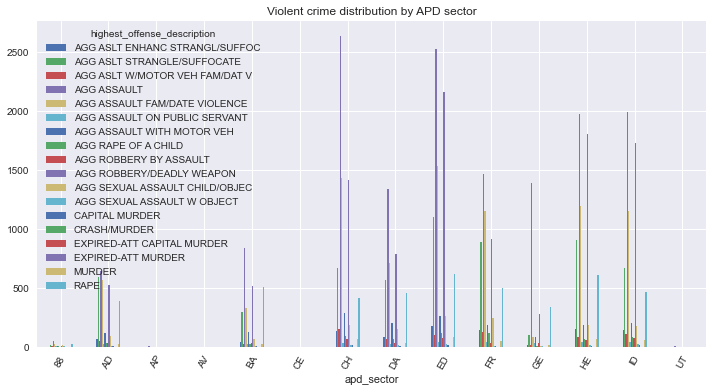

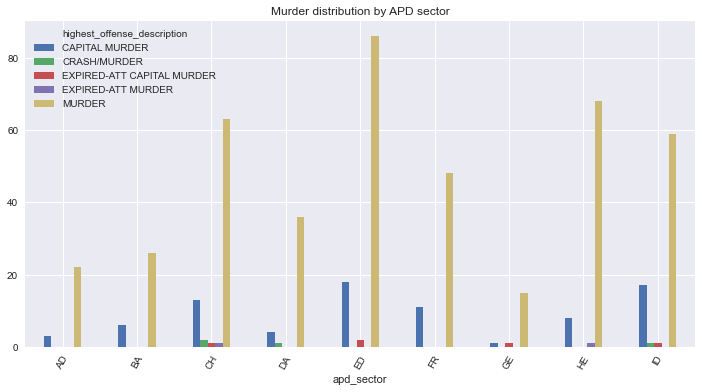

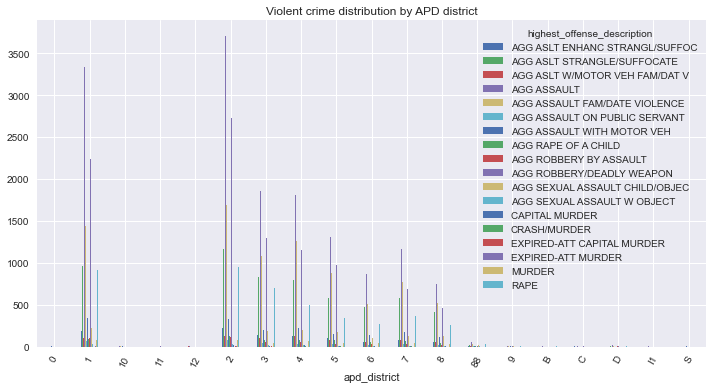

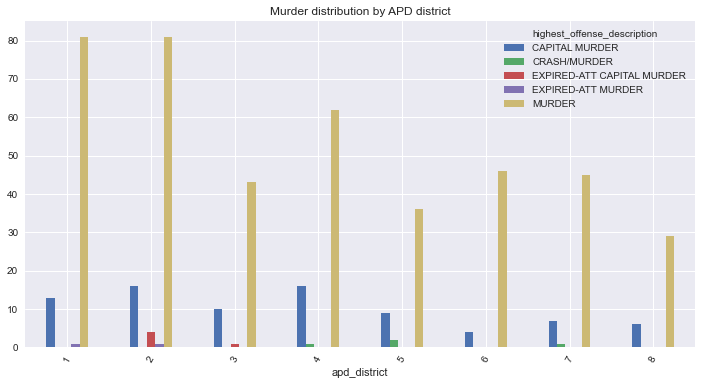

In [20]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(figsize=(12, 6), rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD district"
)
plt.show()

### K. Violent crime and murder distribution by location type

highest_offense_description,AGG ASLT ENHANC STRANGL/SUFFOC,AGG ASLT STRANGLE/SUFFOCATE,AGG ASLT W/MOTOR VEH FAM/DAT V,AGG ASSAULT,AGG ASSAULT FAM/DATE VIOLENCE,AGG ASSAULT ON PUBLIC SERVANT,AGG ASSAULT WITH MOTOR VEH,AGG RAPE OF A CHILD,AGG ROBBERY BY ASSAULT,AGG ROBBERY/DEADLY WEAPON,AGG SEXUAL ASSAULT CHILD/OBJEC,AGG SEXUAL ASSAULT W OBJECT,CAPITAL MURDER,CRASH/MURDER,EXPIRED-ATT CAPITAL MURDER,EXPIRED-ATT MURDER,MURDER,RAPE
location_type,,,,,,,,,,,,,,,,,,
ABANDONED/CONDEMNED STRUCTURE,1,1,0,14,2,0,0,0,0,7,0,0,0,0,0,0,1,4
AMUSEMENT PARK,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ATM SEPARATE FROM BANK,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0
AUTO DEALERSHIP NEW / USED,0,0,0,10,0,0,1,0,0,2,0,0,0,0,0,0,0,1
BANKS / SAVINGS & LOAN,0,0,0,5,2,3,1,0,1,134,1,0,0,0,0,0,1,1
BAR / NIGHT CLUB,0,17,0,674,22,5,10,0,5,46,0,0,2,0,0,0,8,79
CAMP / CAMPGROUND,0,10,0,23,7,0,0,0,0,2,0,1,0,0,0,0,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,0,2,1,21,4,1,2,0,2,5,5,0,1,0,0,0,0,7


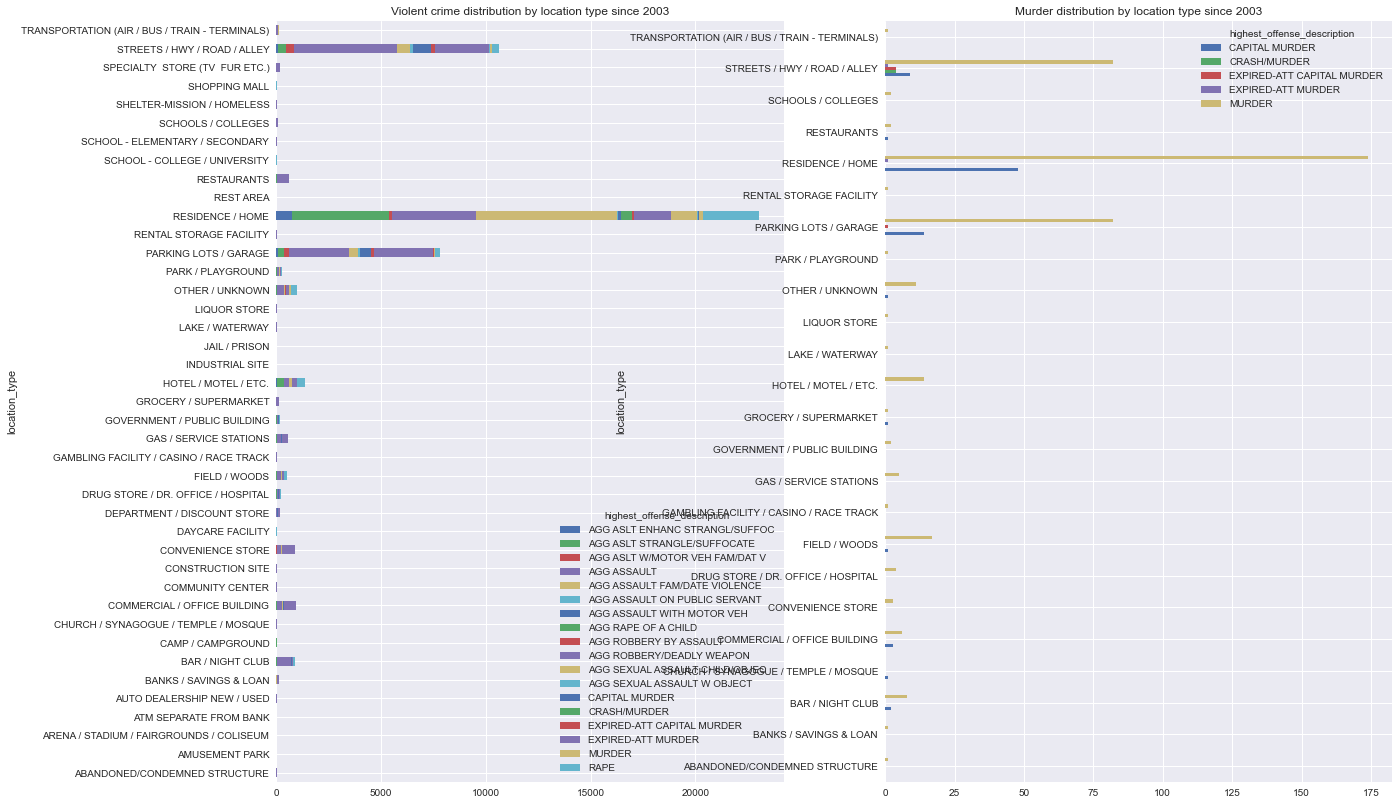

In [21]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003",
    ax=axs[0],
    stacked=True,
)
mur_loc.plot.barh(title="Murder distribution by location type since 2003", ax=axs[1])
plt.show()


viol_loc.to_csv("viol_loc.csv")

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [22]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [23]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [24]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [25]:
df.address.value_counts().head(50).to_frame()

,address
4110 GUADALUPE ST,11622
1030 NORWOOD PARK BLVD,9231
2901 S CAPITAL OF TEXAS HWY NB,8138
3600 PRESIDENTIAL BLVD,7388
500 E 7TH ST,6124
1000 E 41ST ST,5835
3708 S 2ND ST,5257
2508 E RIVERSIDE DR,4842
11200 LAKELINE MALL DR,4510
9300 S IH 35 SVRD SB,4083


In [26]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13).to_frame()

,address
1137 GUNTER ST,114
6409 SPRINGDALE RD,112
1700 BURTON DR,105
1071 CLAYTON LN,99
500 E 7TH ST,93
1054 SPRINGDALE RD,93
9200 NORTH PLZ,88
9024 NORTHGATE BLVD,88
6103 MANOR RD,86
1500 FARO DR,84


In [27]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30).to_frame()

,address
6407 SPRINGDALE RD,3
8800 N IH 35 SVRD SB,3
6409 SPRINGDALE RD,3
8610 N LAMAR BLVD,3
4700 E RIVERSIDE DR,3
2915 S IH 35 SVRD NB,2
2713 S CONGRESS AVE,2
1137 GUNTER ST,2
10610 MORADO CIR,2
9010 GALEWOOD DR,2


In [28]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")
df_21.to_csv("df_21.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")
df_viol_21.to_csv("df_viol_21.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")
df_viol_mur_21.to_csv("df_viol_mur_21.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")